![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 3: Image processing exercises

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-10-22)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/06_Image_processing.ipynb)

**Resources:**

* [SciPy](https://scipy.org)
* [Scipy Lectures](https://scipy-lectures.org)
* [NumPy](https://numpy.org)

# EXERCISE 1: image filtering [OBLIGATORY]

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg



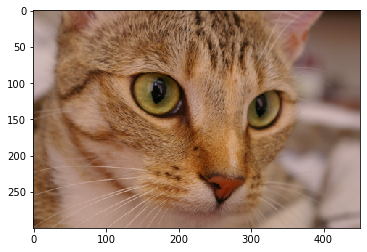

In [1]:
import numpy as np
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
import imageio

from skimage.data import chelsea

cat = chelsea()

plt.imshow(cat)
plt.show()

In [2]:
type(cat)      

print("\n", cat.shape, cat.dtype)


 (300, 451, 3) uint8


### 1.1) Crop the image

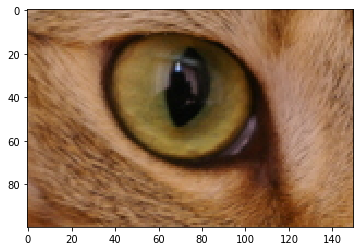

In [3]:
plt.imshow(cat[75:175, 100:250])
plt.show()

### 1.2) Smoothen the image with a kernel filter.

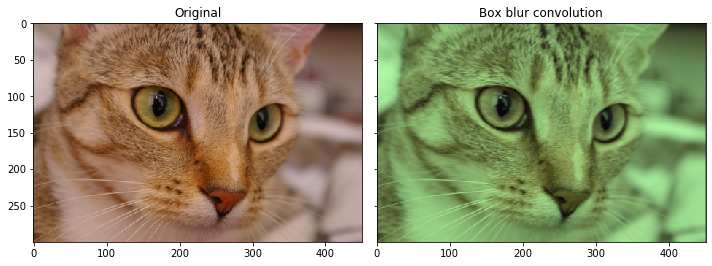

In [4]:
kernel_1 = np.array([[ [1/7,1/7,1/7], 
                    [1/7,1/7,1/7], 
                    [1/7,1/7,1/7]]]) 

smoothen = ndimage.convolve(cat, kernel_1, mode='constant', cval=10.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(cat, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(smoothen, cmap=plt.cm.gray)
ax[1].set_title('Box blur convolution')

plt.tight_layout()
plt.show()

### 1.3) Sharpen the image with a kernel filter

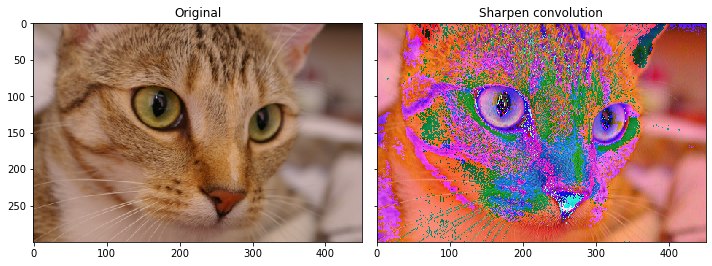

In [5]:


kernel_2 = np.array([[ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]]])


sharpen = ndimage.convolve(cat, kernel_2, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(cat, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(sharpen, cmap=plt.cm.gray)
ax[1].set_title('Sharpen convolution')

plt.tight_layout()
plt.show()

### 1.4) Find the edges of the image with at least two different methods.

#### 1.4.1) Vertical edge convolution:

[[[-1  0  1]
  [-1  0  1]
  [-1  0  1]]]


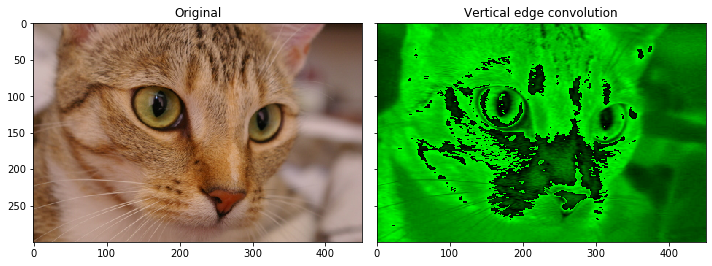

In [7]:
kernel_3 = np.array([[ [-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]]])

print(kernel_3)

vertical = ndimage.convolve(cat, kernel_3, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(cat, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(vertical, cmap=plt.cm.gray)
ax[1].set_title('Vertical edge convolution')

plt.tight_layout()
plt.show()

#### 1.4.2) Horizontal edge convolution:

[[[ 1  1  1]
  [ 0  0  0]
  [-1 -1 -1]]]


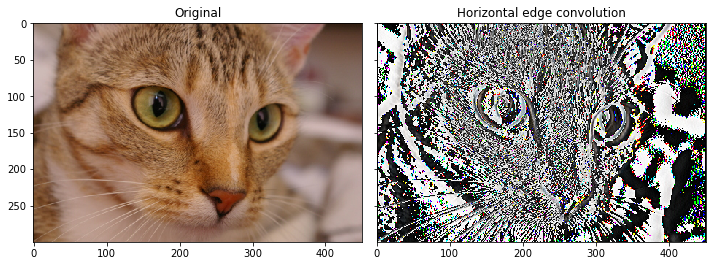

In [9]:
kernel_4 = np.array([[ [1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]]])

print(kernel_4)

horizontal = ndimage.convolve(cat, kernel_4, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(cat, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(horizontal, cmap=plt.cm.gray)
ax[1].set_title('Horizontal edge convolution')

plt.tight_layout()
plt.show()

### 1.5) From the processes above, save the image that you prefer as a .jpg

In [10]:
from skimage.io import imsave

imsave("cat_sharpen.jpeg", sharpen)

# EXERCISE 2: image segmentation [OBLIGATORY]

Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background).

* Load the image with scikit image
* Count the objects in the image using region based segmentation
* Try to fix the image using opening/closing algorithms



### 2.1) Load the image with scikit image

In [11]:
import os
os.getcwd()

'/Users/MarcelRos/Desktop/BTS/GitHub/bts-mbds-data-science-foundations-2019/sessions/Notebooks'

<function matplotlib.pyplot.show(*args, **kw)>

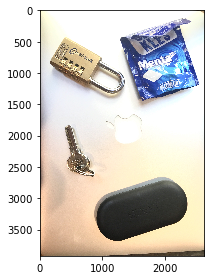

In [15]:
from skimage import data
from skimage.io import imsave, imread, imshow
import matplotlib.pyplot as plt


tools = imread("/Users/MarcelRos/Desktop/BTS/GitHub/bts-mbds-data-science-foundations-2019/sessions/img/tools.jpg")
imshow(tools)

plt.imshow(tools)
plt.show

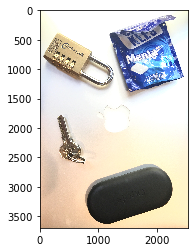

In [25]:
import scipy.misc
from scipy import ndimage


tools_2 = tools[50:3750, 100:]
plt.imshow(tools_2)

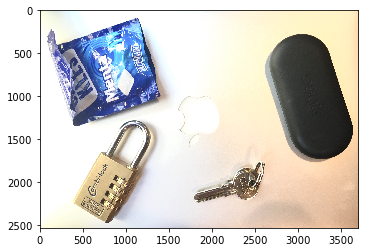

In [17]:
tools_3 = ndimage.rotate(tools_2, 90)
plt.imshow(tools_3)

### 2.2) Count the objects in the image using region based segmentation

In [18]:
from skimage.color import rgb2gray

tools_4 = rgb2gray(tools_3)


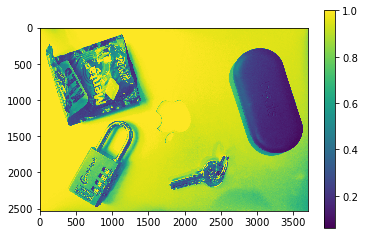

In [19]:
plt.imshow(tools_4)
plt.colorbar()
plt.show()


//anaconda2/envs/bts36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


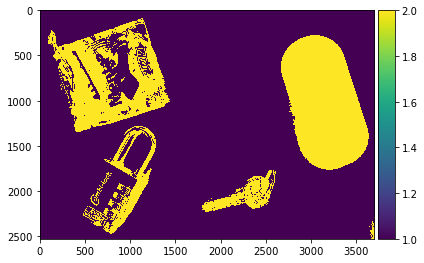

In [20]:
import numpy as np
markers = np.zeros_like(tools_4)

# When the pixels are above 0.6 (see image above), we can label as background(1)
markers[tools_4 > 0.65] = 1

# When the pixels are below 0.6 (see image above), we can label as tools(2)
markers[tools_4 < 0.65] = 2
imshow(markers)

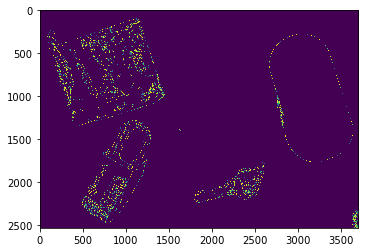

In [21]:
from skimage.filters import sobel

sobel = sobel(markers)

plt.imshow(sobel)
plt.show()


//anaconda2/envs/bts36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


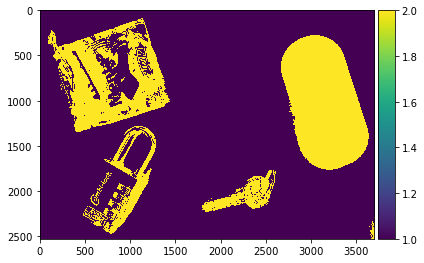

In [22]:
from skimage.morphology import watershed
segmentation = watershed(sobel, markers)
imshow(segmentation)

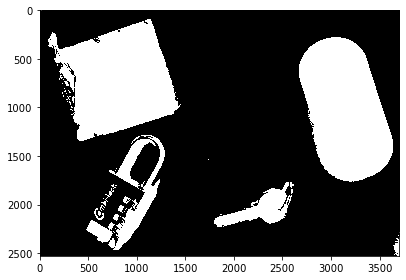

In [26]:
segmentation_treshold = ndimage.binary_fill_holes(segmentation-1)
imshow(segmentation_treshold)

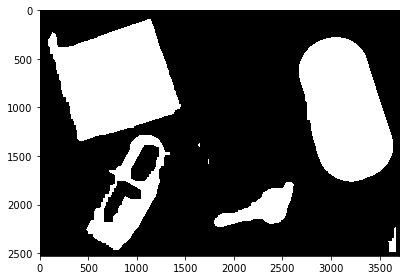

In [27]:
close_img = ndimage.binary_closing(segmentation_treshold, structure=np.ones((90,90)))
imshow(close_img)

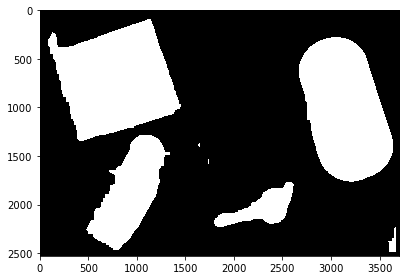

In [28]:
segmentation_treshold = ndi.binary_fill_holes(close_img)
imshow(segmentation_treshold)

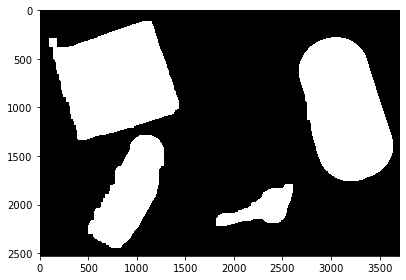

In [29]:
open_square = ndi.binary_opening(segmentation_treshold, structure=np.ones((80,80)))
imshow(open_square)

4


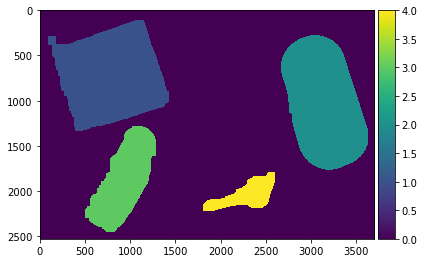

In [30]:
label_objects, nb_labels = ndi.label(open_square)
print(nb_labels)
imshow(label_objects)